<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Skewness-of-the-data-:" data-toc-modified-id="Skewness-of-the-data-:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Skewness of the data :</a></span></li><li><span><a href="#Dealing-with-outliers" data-toc-modified-id="Dealing-with-outliers-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Dealing with outliers</a></span><ul class="toc-item"><li><span><a href="#Z-Score" data-toc-modified-id="Z-Score-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Z-Score</a></span></li><li><span><a href="#Checking-outliers-of-top-10-numeric-variables" data-toc-modified-id="Checking-outliers-of-top-10-numeric-variables-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Checking outliers of top 10 numeric variables</a></span></li></ul></li><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Feature Engineering</a></span><ul class="toc-item"><li><span><a href="#Merge-train-and-test-sets" data-toc-modified-id="Merge-train-and-test-sets-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Merge train and test sets</a></span></li><li><span><a href="#Remove-Extraneous-Columns" data-toc-modified-id="Remove-Extraneous-Columns-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Remove Extraneous Columns</a></span></li><li><span><a href="#Checking-Missing-Values" data-toc-modified-id="Checking-Missing-Values-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Checking Missing Values</a></span></li></ul></li><li><span><a href="#Log-Transformation" data-toc-modified-id="Log-Transformation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Log Transformation</a></span></li><li><span><a href="#One-Hot-Encoding" data-toc-modified-id="One-Hot-Encoding-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>One Hot Encoding</a></span></li><li><span><a href="#Split-again-the-train-and-test-data" data-toc-modified-id="Split-again-the-train-and-test-data-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Split again the train and test data</a></span></li><li><span><a href="#Store-the-data" data-toc-modified-id="Store-the-data-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Store the data</a></span></li></ul></div>

# Data-Preprocessing

**Here we will give solutions to the below problems identified in Data Exploration step:**   
1. The target variables SalePrice has a right-skewed distribution.
1. Outlier values in numeric and categorical variables.
1. 19 features have missing values.
1. Most of numeric variables are right skewed.
1. Numeric and categorical variables have to be combined to use algorithn and make prediction.   
1. Correlation matrix shows multicollinearity. -> This has been solved in Feature Selection phase.

## Skewness of the data :

Skewness is a measure of the degree of asymmetry of a distribution. If the left tail (tail at small end of the distribution) is more pronounced than the right tail (tail at the large end of the distribution), the function is said to have negative skewness. If the reverse is true, it has positive skewness. If the two are equal, it has zero skewness. The target variable is right skewed. As (linear) models favor normally distributed data , we need to transform this variable and make it more normally distributed.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

('Skew is:', 1.8828757597682129)


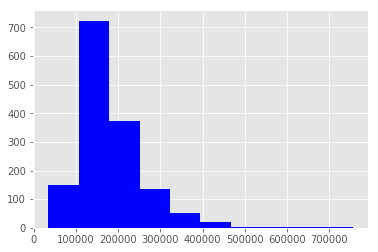

In [3]:
print ("Skew is:", train.SalePrice.skew())
plt.hist(train.SalePrice, color='blue')
plt.show()

**Problem:** The target variables SalePrice has a right-skewed distribution.

**Solution:** We apply log function to have a normal distribution 

('Skew is:', 0.12133506220520406)


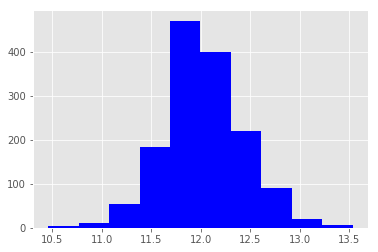

In [4]:
target = np.log(train.SalePrice)
print ("Skew is:", target.skew())
plt.hist(target, color='blue')
plt.show()

## Dealing with outliers

### Z-Score 

**Problem:** Outlier values in numeric variables.

**Solution:** We will use Z-Score to remove otliers systematically.

First, we will check "Ground Living Area feature":

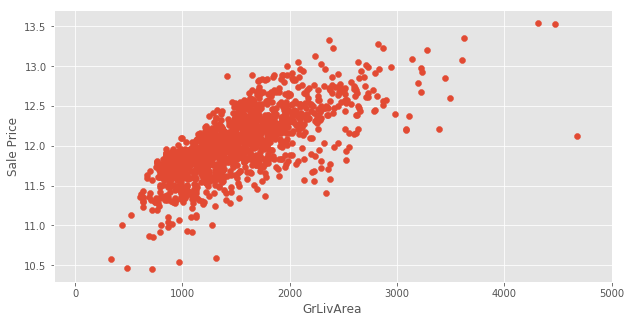

In [5]:
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
plt.scatter(x=train['GrLivArea'], y=np.log(train.SalePrice))
plt.xlim(-200,5000) # This forces the same scale as before

plt.ylabel('Sale Price')
plt.xlabel('GrLivArea')
plt.show()

In [6]:
train.shape

(1460, 81)

**Observation:**   
We see that there is some outliers in the right part of the scatter plot.

We will apply Z-Score and see how it works.

In [7]:
from scipy import stats
import numpy as np

x=train['GrLivArea']
z = np.abs(stats.zscore(x))
t = train[ np.abs(stats.zscore(x)) < 3]
t.shape

(1444, 81)

In [8]:
x_o = x.where(z < 3)

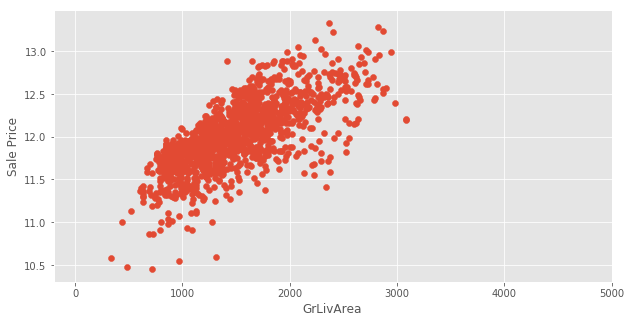

In [9]:
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
plt.scatter(x_o, y=np.log(train.SalePrice))
plt.xlim(-200,5000) # This forces the same scale as before

plt.ylabel('Sale Price')
plt.xlabel('GrLivArea')
plt.show()

### Checking outliers of top 10 numeric variables

We apply the Z-Score method to the top 10 numeric variables found in Data Exploration except ordinal variables and display before and after the method application side by side to see how it works.

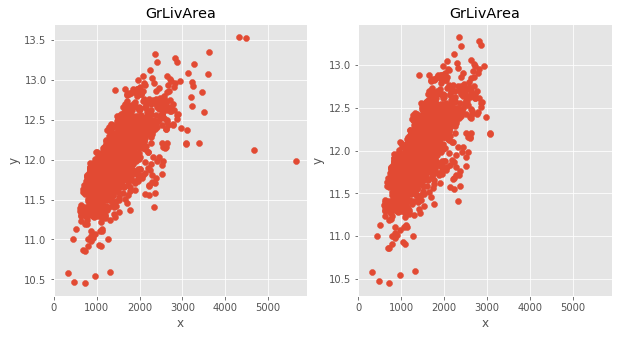

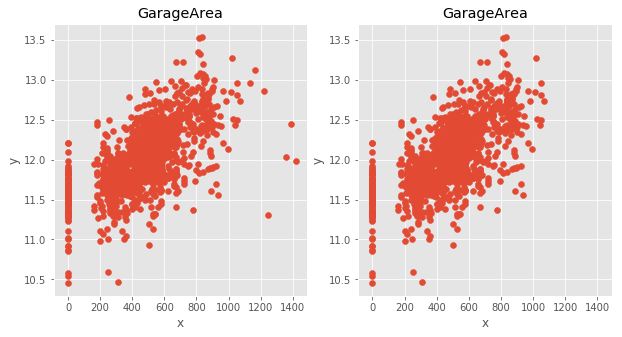

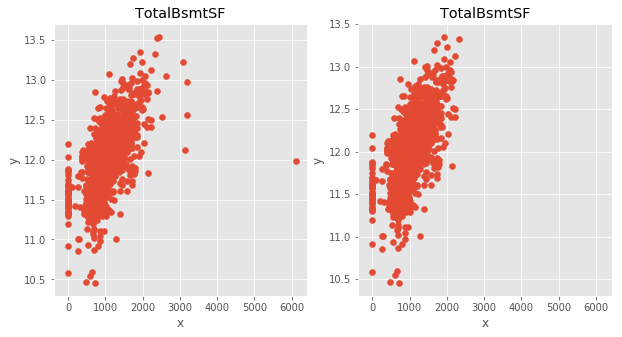

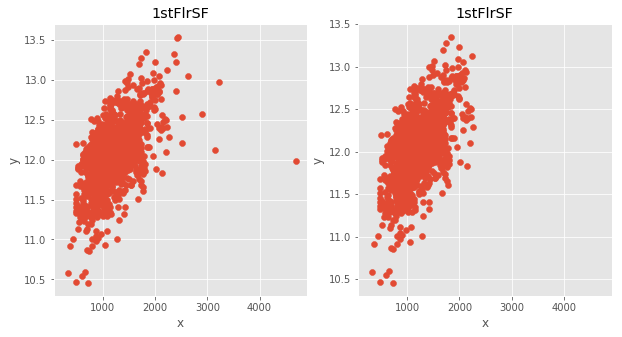

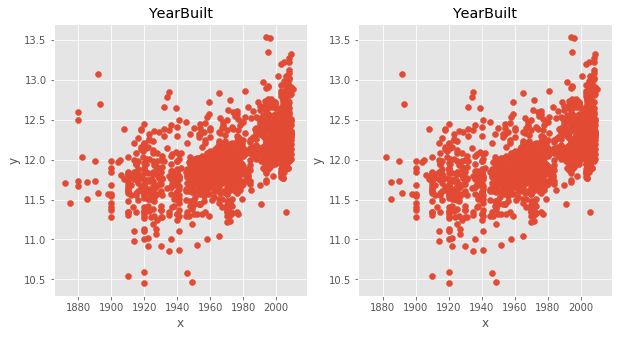

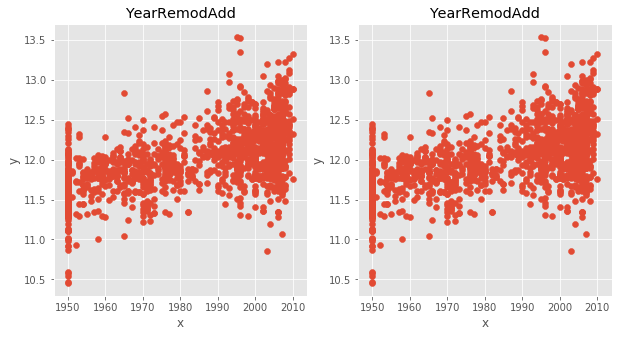

In [10]:
from scipy import stats
import numpy as np

def plot_feature(x):
    y=np.log(train.SalePrice)
    plt.scatter(x, y)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(x.name)

features=['GrLivArea', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'YearBuilt', 'YearRemodAdd']    
for feature in features:
    x = train[feature]
    fig , (ax1,ax2) = plt.subplots(1,2, figsize=(10,5), sharex=True)
    plt.subplot(ax1)
    plot_feature(x)
    z = np.abs(stats.zscore(x))
    threshold = 3
    x = x.where(z<3)
    plt.subplot(ax2)
    plot_feature(x)


**Observations:**   
Outliers are removed from 'GrLivArea', 'GarageArea', 'TotalBsmtSF', and '1stFlrSF'. But 'YearBuilt' and 'YearRemodAdd' seem to be the same by the operation.

In [11]:
x=t['GarageArea']
t2 = t[ np.abs(stats.zscore(x)) < 3]
t2.shape

(1438, 81)

In [12]:
x=t2['TotalBsmtSF']
t3 = t2[ np.abs(stats.zscore(x)) < 3]
t3.shape

(1432, 81)

In [13]:
x=t3['1stFlrSF']
t4 = t3[ np.abs(stats.zscore(x)) < 3]
t4.shape

(1426, 81)

In [14]:
train=t4

## Feature Engineering

### Merge train and test sets

Before doing any transformation to the data , we need the merge both train and test sets so we can apply the same methods to both of them.

In [15]:
# we concatenate both train and test set

ntrain = train.shape[0]
ntest = test.shape[0]
ytrain_1 = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2885, 80)


### Remove Extraneous Columns

We can then remove any extraneous columns in all_data. We use features selected in Feature Selection step.

In [17]:
select_features = ['TotalBsmtSF','MSSubClass','LotFrontage','OverallQual','OverallCond','YearBuilt','YearRemodAdd','MasVnrArea','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','ScreenPorch','MoSold','YrSold','Neighborhood','ExterQual','KichenQual','Foundation','HeatingQual','SaleCondition','Exterior1st','Exterior2nd','SaleType','MSZoning','HouseStyle','LotShape','CentralAir','PavedDrive','RoofStyle','BldgType','LandContour','RoofMatl','Condition1','ExterCond','LotConfig','Functional','LotConfig','Functional','Heating','Condition2','Street','Landslope']
all_data = all_data.loc[:,select_features]

all_data.shape

(2885, 54)

### Checking Missing Values

**Problem:** Features have missing values.

**Solution:** We will use fillna method.

In [18]:
#check missing values
all_data.columns[all_data.isnull().any()]


Index([u'TotalBsmtSF', u'LotFrontage', u'MasVnrArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'GarageYrBlt', u'GarageCars', u'KichenQual',
       u'HeatingQual', u'Exterior1st', u'Exterior2nd', u'SaleType',
       u'MSZoning', u'Functional', u'Functional', u'Functional', u'Functional',
       u'Landslope'],
      dtype='object')

In [19]:
all_data = all_data.fillna(0)

In [20]:
all_data.columns[all_data.isnull().any()]

Index([], dtype='object')

In [21]:
all_data.head()

,TotalBsmtSF,MSSubClass,LotFrontage,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,GrLivArea,BsmtFullBath,...,Functional,Functional,LotConfig,LotConfig,Functional,Functional,Heating,Condition2,Street,Landslope
0,856.0,60,65.0,7,5,2003,2003,196.0,1710,1.0,...,Typ,Typ,Inside,Inside,Typ,Typ,GasA,Norm,Pave,0.0
1,1262.0,20,80.0,6,8,1976,1976,0.0,1262,0.0,...,Typ,Typ,FR2,FR2,Typ,Typ,GasA,Norm,Pave,0.0
2,920.0,60,68.0,7,5,2001,2002,162.0,1786,1.0,...,Typ,Typ,Inside,Inside,Typ,Typ,GasA,Norm,Pave,0.0
3,756.0,70,60.0,7,5,1915,1970,0.0,1717,1.0,...,Typ,Typ,Corner,Corner,Typ,Typ,GasA,Norm,Pave,0.0
4,1145.0,60,84.0,8,5,2000,2000,350.0,2198,1.0,...,Typ,Typ,FR2,FR2,Typ,Typ,GasA,Norm,Pave,0.0


## Log Transformation

**Problem:** Most of numeric variables are right skewed.

**Solution:** We apply log transformation to all the numericals.

In [22]:
numericals = all_data.select_dtypes(include=[np.number])
numericals.head(5)

,TotalBsmtSF,MSSubClass,LotFrontage,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,GrLivArea,BsmtFullBath,...,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,ScreenPorch,MoSold,YrSold,KichenQual,HeatingQual,Landslope
0,856.0,60,65.0,7,5,2003,2003,196.0,1710,1.0,...,8,0,2003.0,2.0,0,2,2008,0.0,0.0,0.0
1,1262.0,20,80.0,6,8,1976,1976,0.0,1262,0.0,...,6,1,1976.0,2.0,0,5,2007,0.0,0.0,0.0
2,920.0,60,68.0,7,5,2001,2002,162.0,1786,1.0,...,6,1,2001.0,2.0,0,9,2008,0.0,0.0,0.0
3,756.0,70,60.0,7,5,1915,1970,0.0,1717,1.0,...,7,1,1998.0,3.0,0,2,2006,0.0,0.0,0.0
4,1145.0,60,84.0,8,5,2000,2000,350.0,2198,1.0,...,9,1,2000.0,3.0,0,12,2008,0.0,0.0,0.0


In [23]:
num_columns = numericals.columns.values.tolist()

all_data[num_columns] = all_data[num_columns].replace(0, np.nan)
all_data.loc[:,num_columns] = np.log(all_data[num_columns])
all_data[num_columns] = all_data[num_columns].replace(np.nan, 0)

all_data[num_columns].head(10)

,TotalBsmtSF,MSSubClass,LotFrontage,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,GrLivArea,BsmtFullBath,...,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,ScreenPorch,MoSold,YrSold,KichenQual,HeatingQual,Landslope
0,6.752270,4.094345,4.174387,1.945910,1.609438,7.602401,7.602401,5.278115,7.444249,0.0,...,2.079442,0.000000,7.602401,0.693147,0.0,0.693147,7.604894,0.0,0.0,0.0
1,7.140453,2.995732,4.382027,1.791759,2.079442,7.588830,7.588830,0.000000,7.140453,0.0,...,1.791759,0.000000,7.588830,0.693147,0.0,1.609438,7.604396,0.0,0.0,0.0
2,6.824374,4.094345,4.219508,1.945910,1.609438,7.601402,7.601902,5.087596,7.487734,0.0,...,1.791759,0.000000,7.601402,0.693147,0.0,2.197225,7.604894,0.0,0.0,0.0
3,6.628041,4.248495,4.094345,1.945910,1.609438,7.557473,7.585789,0.000000,7.448334,0.0,...,1.945910,0.000000,7.599902,1.098612,0.0,0.693147,7.603898,0.0,0.0,0.0
4,7.043160,4.094345,4.430817,2.079442,1.609438,7.600902,7.600902,5.857933,7.695303,0.0,...,2.197225,0.000000,7.600902,1.098612,0.0,2.484907,7.604894,0.0,0.0,0.0
5,6.679599,3.912023,4.442651,1.609438,1.609438,7.597396,7.598399,0.000000,7.216709,0.0,...,1.609438,0.000000,7.597396,0.693147,0.0,2.302585,7.605392,0.0,0.0,0.0
6,7.430114,2.995732,4.317488,2.079442,1.609438,7.602900,7.603399,5.225747,7.434848,0.0,...,1.945910,0.000000,7.602900,0.693147,0.0,2.079442,7.604396,0.0,0.0,0.0
7,7.009409,4.094345,0.000000,1.945910,1.791759,7.587311,7.587311,5.480639,7.644919,0.0,...,1.945910,0.693147,7.587311,0.693147,0.0,2.397895,7.605392,0.0,0.0,0.0
8,6.858565,3.912023,3.931826,1.945910,1.609438,7.565793,7.575585,0.000000,7.480992,0.0,...,2.079442,0.693147,7.565793,0.693147,0.0,1.386294,7.604894,0.0,0.0,0.0
9,6.898715,5.247024,3.912023,1.609438,1.791759,7.569928,7.575585,0.000000,6.981935,0.0,...,1.609438,0.693147,7.569928,0.000000,0.0,0.000000,7.604894,0.0,0.0,0.0


## One Hot Encoding

**Problem:** Numeric and categorical variables have to be combined to use algorithm and make prediction. 

**Solution:** We will use 'One Hot Encoding' which is a method to transform categorical features to a format that works better with classification and regression algorithms. We generate one boolean column for each category. Only one of these columns could take on the value 1 for each sample.

In [24]:
all_data = pd.get_dummies(all_data)
all_data.head()

,TotalBsmtSF,MSSubClass,LotFrontage,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,GrLivArea,BsmtFullBath,...,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Street_Grvl,Street_Pave
0,6.752270,4.094345,4.174387,1.945910,1.609438,7.602401,7.602401,5.278115,7.444249,0.0,...,0,0,1,0,0,0,0,0,0,1
1,7.140453,2.995732,4.382027,1.791759,2.079442,7.588830,7.588830,0.000000,7.140453,0.0,...,0,0,1,0,0,0,0,0,0,1
2,6.824374,4.094345,4.219508,1.945910,1.609438,7.601402,7.601902,5.087596,7.487734,0.0,...,0,0,1,0,0,0,0,0,0,1
3,6.628041,4.248495,4.094345,1.945910,1.609438,7.557473,7.585789,0.000000,7.448334,0.0,...,0,0,1,0,0,0,0,0,0,1
4,7.043160,4.094345,4.430817,2.079442,1.609438,7.600902,7.600902,5.857933,7.695303,0.0,...,0,0,1,0,0,0,0,0,0,1


## Split again the train and test data

We split again the train and test data after al the transformations applies respecting the previoous organization.

In [25]:
target = pd.DataFrame(ytrain_1, columns=['SalePrice']) 

In [26]:
train_set_1 = all_data[:ntrain]
test_set_1 = all_data[ntrain:]

## Store the data

We store both train and test data for future uses.

In [27]:
#save train set
%store train_set_1
train_set_1.head()

Stored 'train_set_1' (DataFrame)


,TotalBsmtSF,MSSubClass,LotFrontage,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,GrLivArea,BsmtFullBath,...,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Street_Grvl,Street_Pave
0,6.752270,4.094345,4.174387,1.945910,1.609438,7.602401,7.602401,5.278115,7.444249,0.0,...,0,0,1,0,0,0,0,0,0,1
1,7.140453,2.995732,4.382027,1.791759,2.079442,7.588830,7.588830,0.000000,7.140453,0.0,...,0,0,1,0,0,0,0,0,0,1
2,6.824374,4.094345,4.219508,1.945910,1.609438,7.601402,7.601902,5.087596,7.487734,0.0,...,0,0,1,0,0,0,0,0,0,1
3,6.628041,4.248495,4.094345,1.945910,1.609438,7.557473,7.585789,0.000000,7.448334,0.0,...,0,0,1,0,0,0,0,0,0,1
4,7.043160,4.094345,4.430817,2.079442,1.609438,7.600902,7.600902,5.857933,7.695303,0.0,...,0,0,1,0,0,0,0,0,0,1


In [28]:
#save test set
%store test_set_1
test_set_1.shape

Stored 'test_set_1' (DataFrame)


(1459, 236)

In [29]:
#save ytrain
%store ytrain_1
ytrain_1

Stored 'ytrain_1' (ndarray)


array([208500, 181500, 223500, ..., 266500, 142125, 147500], dtype=int64)